# CLIP Interrogator by [@pharmapsychotic](https://twitter.com/pharmapsychotic) 

<br>

What do the different OpenAI CLIP models see in an image? What might be a good text prompt to create similar images using CLIP guided diffusion or another text to image model? The CLIP Interrogator is here to get you answers!

<br>

If this notebook is helpful to you please consider buying me a coffee via [ko-fi](https://ko-fi.com/pharmapsychotic) or following me on [twitter](https://twitter.com/pharmapsychotic) for more cool Ai stuff. 🙂

And if you're looking for more Ai art tools check out my [Ai generative art tools list](https://pharmapsychotic.com/tools.html).


In [1]:
#@title Check GPU
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3090 (UUID: GPU-8c5f31c0-aec4-5828-1fc6-24bd25119294)
GPU 1: NVIDIA GeForce RTX 3090 (UUID: GPU-99ffc975-a6e6-3d71-c76b-0fc2d35723ad)


In [3]:
#@title Setup
%cd ./BLIP

import clip
import gc
import numpy as np
import os
import pandas as pd
import requests
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF

from IPython.display import display
from PIL import Image
from torch import nn
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from models.blip import blip_decoder
import cv2
import datetime
from IPython.core.display import HTML
import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

blip_image_eval_size = 384
blip_model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model*_base_caption.pth'        
blip_model = blip_decoder(pretrained=blip_model_url, image_size=blip_image_eval_size, vit='base')
blip_model.eval()
blip_model = blip_model.to(device)

def generate_caption(pil_image):
    gpu_image = transforms.Compose([
        transforms.Resize((blip_image_eval_size, blip_image_eval_size), interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
    ])(image).unsqueeze(0).to(device)

    with torch.no_grad():
        caption = blip_model.generate(gpu_image, sample=False, num_beams=3, max_length=1000, min_length=100)
    return caption[0]

def interrogate(image, models):
    caption = generate_caption(image)
    if len(models) == 0:
        print(f"\n\n{caption}")
        return

    table = []
    bests = [[('',0)]]*5
    flaves = ', '.join([f"{x[0]}" for x in bests[4]])
    medium = bests[0][0][0]
    print(f"\n\n{caption}")



/home/arty/clip-interrogator/BLIP


/home/arty/miniconda3/envs/camus/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model*_base_caption.pth


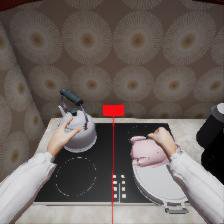



a person holding a remote control over a table with a cake on it and a person holding a cell phone in front of the table with a picture of a person holding a cake on the table with a phone and a hand with a red line on the edge of the edge of the edge of the edge of the plate, that,??????????????????????????????


In [15]:
all_task = './boil.mp4'

In [11]:
pwd

'/home/arty/clip-interrogator/BLIP'

In [13]:
video_cv2 = cv2.VideoCapture(all_task)
# frame_cv2 = video_cv2.get(cv2.CAP_PROP_FPS)
fps = video_cv2.get(cv2.CAP_PROP_FPS)
print('frames per second =',fps)

frames per second = 25.0


In [14]:
minutes = 0
seconds = 28
frame_id = int(fps*(minutes*60 + seconds))
print('frame id =',frame_id)

frame id = 700


In [16]:

frames = []
video_cv2 = cv2.VideoCapture(all_task)
frame_cv2 = video_cv2.get(cv2.CAP_PROP_FPS)
current_frame = 0
while video_cv2.isOpened():
    ret, frame = video_cv2.read()
    if ret == True:
        frames.append(Image.fromarray(frame[:, :, ::-1]))
    else:
        break
    current_frame += 1
    t_msec = 1000*(minutes*60 + seconds)
    video_cv2.set(cv2.CAP_PROP_POS_MSEC, t_msec)
    # video_cv2.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

print(f"Frames: {len(frames)}")

KeyboardInterrupt: 

In [18]:
import cv2
frames = []
vidcap = cv2.VideoCapture('./boil.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        # cv2.imwrite("image"+str(count)+".jpg", image)
        frames.append(Image.fromarray(image[:, :, ::-1]))
           # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [19]:
len(frames)

70

In [7]:
video_cv2

< cv2.VideoCapture 0x7fd79f5c6f90>

In [17]:
type(frames[0])
len(frames)

1748

In [22]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
def showImagesHorizontally(list_of_files):
    fig = figure()
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

In [26]:
ViTB32 = True #@param{type:"boolean"}
ViTB16 = True #@param{type:"boolean"}
ViTL14 = False #@param{type:"boolean"}
ViTL14_336px = False #@param{type:"boolean"}
RN101 = False #@param{type:"boolean"}
RN50 = True #@param{type:"boolean"}
RN50x4 = False #@param{type:"boolean"}
RN50x16 = False #@param{type:"boolean"}
RN50x64 = False #@param{type:"boolean"}

models = []
if ViTB32: models.append('ViT-B/32')
if ViTB16: models.append('ViT-B/16')
if ViTL14: models.append('ViT-L/14')
if ViTL14_336px: models.append('ViT-L/14@336px')
if RN101: models.append('RN101')
if RN50: models.append('RN50')
if RN50x4: models.append('RN50x4')
if RN50x16: models.append('RN50x16')
if RN50x64: models.append('RN50x64')

image = []
descriptions = []

for i in range(len(frames)):
    image_path_or_url = frames[i]
    image = frames[i]
    thumb = image.copy()
    thumb.thumbnail([blip_image_eval_size, blip_image_eval_size])
    # image.append(display(thumb))
    descriptions.append(interrogate(image, models=models))
    





a computer generated image of a kitchen with a sink, stove, oven, microwave and dishwasher in the center of the room, and a window to the right of the picture is a view of the kitchen, and a door to the left side of the left, a window, and a door, a window, and a window, and a window, and a window, a cabinet, below, below, below, below, a sink, a sink, and cabinet,


a computer rendering of a kitchen with a sink and a stove top oven and a dishwasher and a dishwasher and a microwave on a wooden floor and a window with a door and a window with a door and a window and a light behind it is also a counter with a sink and a window and a cabinet and a cabinet and a cabinet with a cabinet and cabinetry cabinet basin basin basin basin basin basin basin basin basin basin basin basin basin basin basin basin basin basin basin


a kitchen with a sink, stove, microwave, and a microwave oven in the middle of the room with a window on the far side of the room and a door to the other side of the room

In [27]:
len(descriptions)

70

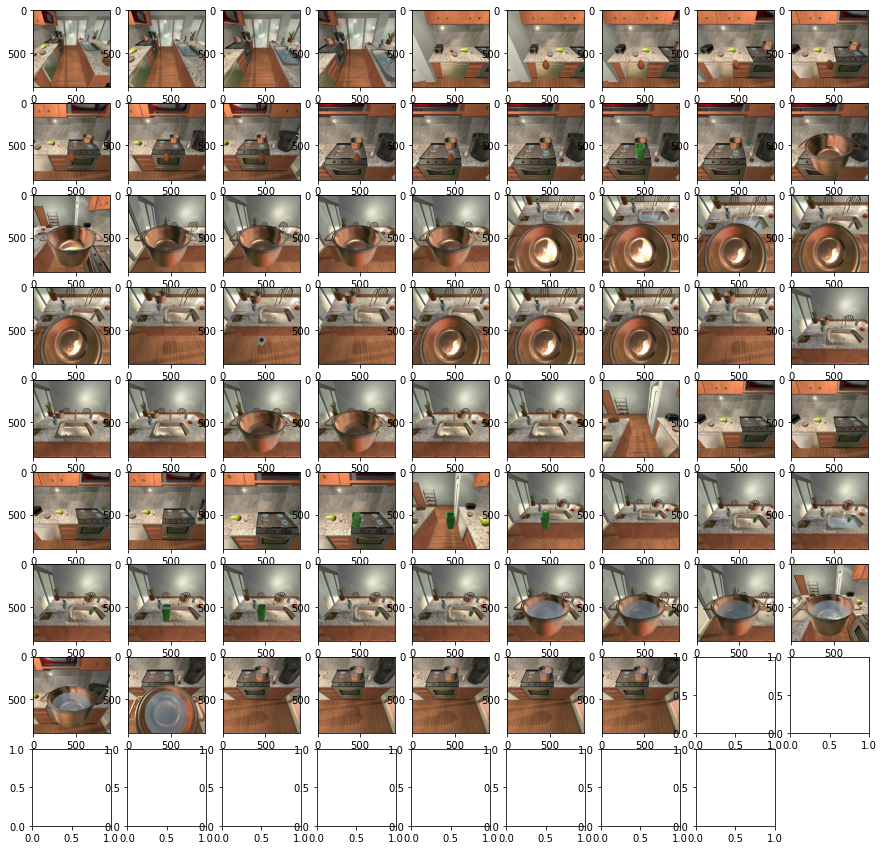

In [47]:
# rows=9
# cols = 9
# img_count = 0

# fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

# for i in range(rows):
#     for j in range(cols):        
#         if img_count < len(frames):
#             axes[i, j].imshow(frames[img_count])
#             img_count+=1
